# Predicting the Likelihood of E-Signing a Loan Based on Financial History

# Machine Learning: Use cases in FINTECH

- The data for these projects are manufactured fields based on trends found in real-world case studies. The fields describe what companies usually track from their users, and the distributions are based on observed distributions in the real-world analysis. This means that, although the data has been artificially created, the patterns, associations, and distributions are not random.


- The data serves as a good representation of what you may encounter in the workplace. That is, the data is rarely clean, and a lot of pre-processing is needed to get it ready for modeling.
***

## Note on models Building:
The Model Building Process is composed of multiple parts:
- **Plotting with Matplotlib and Seaborn** - A lot of time will be spent on Exploratory Data Analysis (EDA)
- **Data Manipulation** - We will use Pandas and Numpy for all of our data formatting steps.
- **Classification Models** from Sklearn Library (Logistic Regression, Tree, SVM, ...)
- **K-Fold Cross Validation, Grid Search** (Parameter Tuning), and **Feature Selection** algorithms.
***

# 1. INTRODUCTION

Lending companies work by analyzing the financial history of their loan applicants and choosing whether or not the applicant is too risky to be given a loan. If the applicant is not, the company then determines the terms of the loan. To acquire these applicants, companies can organically receive them through their websites/ apps, often with the help of advertisement companies. Other times, lending companies partner with peer-to-peer (P2P) lending marketplaces, in order to acquire leads of possible applicants. Some examples of the marketplace include Upstart, Lending Tree, and Lending Club. In this project, we are going to asses the 'quality' of the leads our company receives from these marketplaces.

- **Market:** The target audience is the set of loan applicants who reached out through an intermediary marketplace.
- **Product:** A loan.
- **Goal:** Develop a model to predict for 'quality' applicants are those who reach a key part of the loan application process.
****

# 2. BUSINESS CHALLENGE

- In this Case Study, we will be working for a fin-tech company that specializes in loans. It offers low APR loans to applicants based on their financial habits, as almost all lending companies do. This company has partnered with a P2P lending marketplace that provides real-time leads (loan applicants). The numbers of conversations from these leads are satisfactory.
- The company tasks you with creating a model that predicts whether or not these leads will complete the electronic signature phase of the loan applicant (a.k.a. e_signed). The company seeks to leverage this model to identify less 'qualify' applicants (e.g. those who are not responding to the onboarding process) and experiment with giving them different onboarding screens.
- The reason for selecting the e_signing process as the response variable is due to the structure of the loan application.
- The official application begins with the lead arriving on our website after we opted to acquire it. Here, The applicant begins the onboarding process to apply for a loan. The user begins to provide more financial information by going over every screen of the onboarding process. This first phase ends with the applicant providing his/ her signature indicating all of the given information is correct.
- Any of the following screens, in which the applicant is approved/denied and given the terms of the loan, is dependent on the company, not the applicant stops having control of the application process.
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
pd.set_option('display.max_columns', 500)
data = pd.read_csv("data/Financial-Data.csv")
data.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


# 3. DATA

- Because the applicants arrived through a marketplace, we have access to their financial data before the onboarding process begins. This data includes personal information like age, and time employed, as well as other financial metrics. Our company utilizes these financial data points to create risk scores based on many different risk factors.

- In this case study, we are given the set of scores from algorithms built by the finance and engineering teams. Furthermore, the marketplace itself provides us with their own lead quality scores. We will leverage both sets of scores, as well as small list of personal/financial features to predict if the user is likely to respond to our current onboarding process.
****

In [3]:
data.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

# 4. EXPLORATORY DATA ANALYSIS

In [4]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00,17908.00
mean,5596977.62,43.02,0.43,3657.21,1.19,3.53,3.58,3.43,3.50,0.80,950.45,61086.30,0.69,0.88,0.58,0.72,0.62,0.62,6.46,0.54
std,2562472.75,11.87,0.49,1504.89,2.40,2.26,2.75,2.22,1.96,0.40,698.54,15394.26,0.09,0.05,0.13,0.12,0.14,0.14,3.67,0.50
min,1111398.00,18.00,0.00,905.00,0.00,0.00,0.00,0.00,0.00,0.00,350.00,2100.00,0.02,0.45,0.02,0.15,0.01,0.01,1.00,0.00
25%,3378998.75,34.00,0.00,2580.00,0.00,2.00,2.00,2.00,2.00,1.00,600.00,49350.00,0.64,0.85,0.50,0.63,0.52,0.52,4.00,0.00
50%,5608376.00,42.00,0.00,3260.00,0.00,3.00,3.00,2.00,3.00,1.00,700.00,61200.00,0.70,0.88,0.59,0.73,0.63,0.62,6.00,1.00
75%,7805624.25,51.00,1.00,4670.00,1.00,5.00,5.00,5.00,4.00,1.00,1100.00,72750.00,0.75,0.91,0.67,0.81,0.73,0.73,8.00,1.00
max,9999874.00,96.00,1.00,9985.00,11.00,16.00,12.00,11.00,15.00,1.00,10200.00,99750.00,1.00,1.00,0.98,1.00,0.97,0.97,30.00,1.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
entry_id                17908 non-null int64
age                     17908 non-null int64
pay_schedule            17908 non-null object
home_owner              17908 non-null int64
income                  17908 non-null int64
months_employed         17908 non-null int64
years_employed          17908 non-null int64
current_address_year    17908 non-null int64
personal_account_m      17908 non-null int64
personal_account_y      17908 non-null int64
has_debt                17908 non-null int64
amount_requested        17908 non-null int64
risk_score              17908 non-null int64
risk_score_2            17908 non-null float64
risk_score_3            17908 non-null float64
risk_score_4            17908 non-null float64
risk_score_5            17908 non-null float64
ext_quality_score       17908 non-null float64
ext_quality_score_2     17908 non-null float64
inquiries_last_month   

In [6]:
data.isnull().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [7]:
data.dtypes

entry_id                  int64
age                       int64
pay_schedule             object
home_owner                int64
income                    int64
months_employed           int64
years_employed            int64
current_address_year      int64
personal_account_m        int64
personal_account_y        int64
has_debt                  int64
amount_requested          int64
risk_score                int64
risk_score_2            float64
risk_score_3            float64
risk_score_4            float64
risk_score_5            float64
ext_quality_score       float64
ext_quality_score_2     float64
inquiries_last_month      int64
e_signed                  int64
dtype: object

In [8]:
categorical_col = []

for column in data.columns:
    print(f"===== {column.upper()} =====")
    print(f"Number of unique values: {data[column].nunique()}")
    print(f"Minimum {data[column].min()}")
    print(f"Maximum {data[column].max()}") 
    if data[column].nunique() <= 20:
        categorical_col.append(column)

===== ENTRY_ID =====
Number of unique values: 17888
Minimum 1111398
Maximum 9999874
===== AGE =====
Number of unique values: 72
Minimum 18
Maximum 96
===== PAY_SCHEDULE =====
Number of unique values: 4
Minimum bi-weekly
Maximum weekly
===== HOME_OWNER =====
Number of unique values: 2
Minimum 0
Maximum 1
===== INCOME =====
Number of unique values: 2284
Minimum 905
Maximum 9985
===== MONTHS_EMPLOYED =====
Number of unique values: 12
Minimum 0
Maximum 11
===== YEARS_EMPLOYED =====
Number of unique values: 17
Minimum 0
Maximum 16
===== CURRENT_ADDRESS_YEAR =====
Number of unique values: 13
Minimum 0
Maximum 12
===== PERSONAL_ACCOUNT_M =====
Number of unique values: 12
Minimum 0
Maximum 11
===== PERSONAL_ACCOUNT_Y =====
Number of unique values: 16
Minimum 0
Maximum 15
===== HAS_DEBT =====
Number of unique values: 2
Minimum 0
Maximum 1
===== AMOUNT_REQUESTED =====
Number of unique values: 98
Minimum 350
Maximum 10200
===== RISK_SCORE =====
Number of unique values: 1411
Minimum 2100
Maximum 9

In [9]:
data.e_signed.value_counts()

1    9639
0    8269
Name: e_signed, dtype: int64

### Visualisation of the Features distributions

In [10]:
len(data.columns)

21

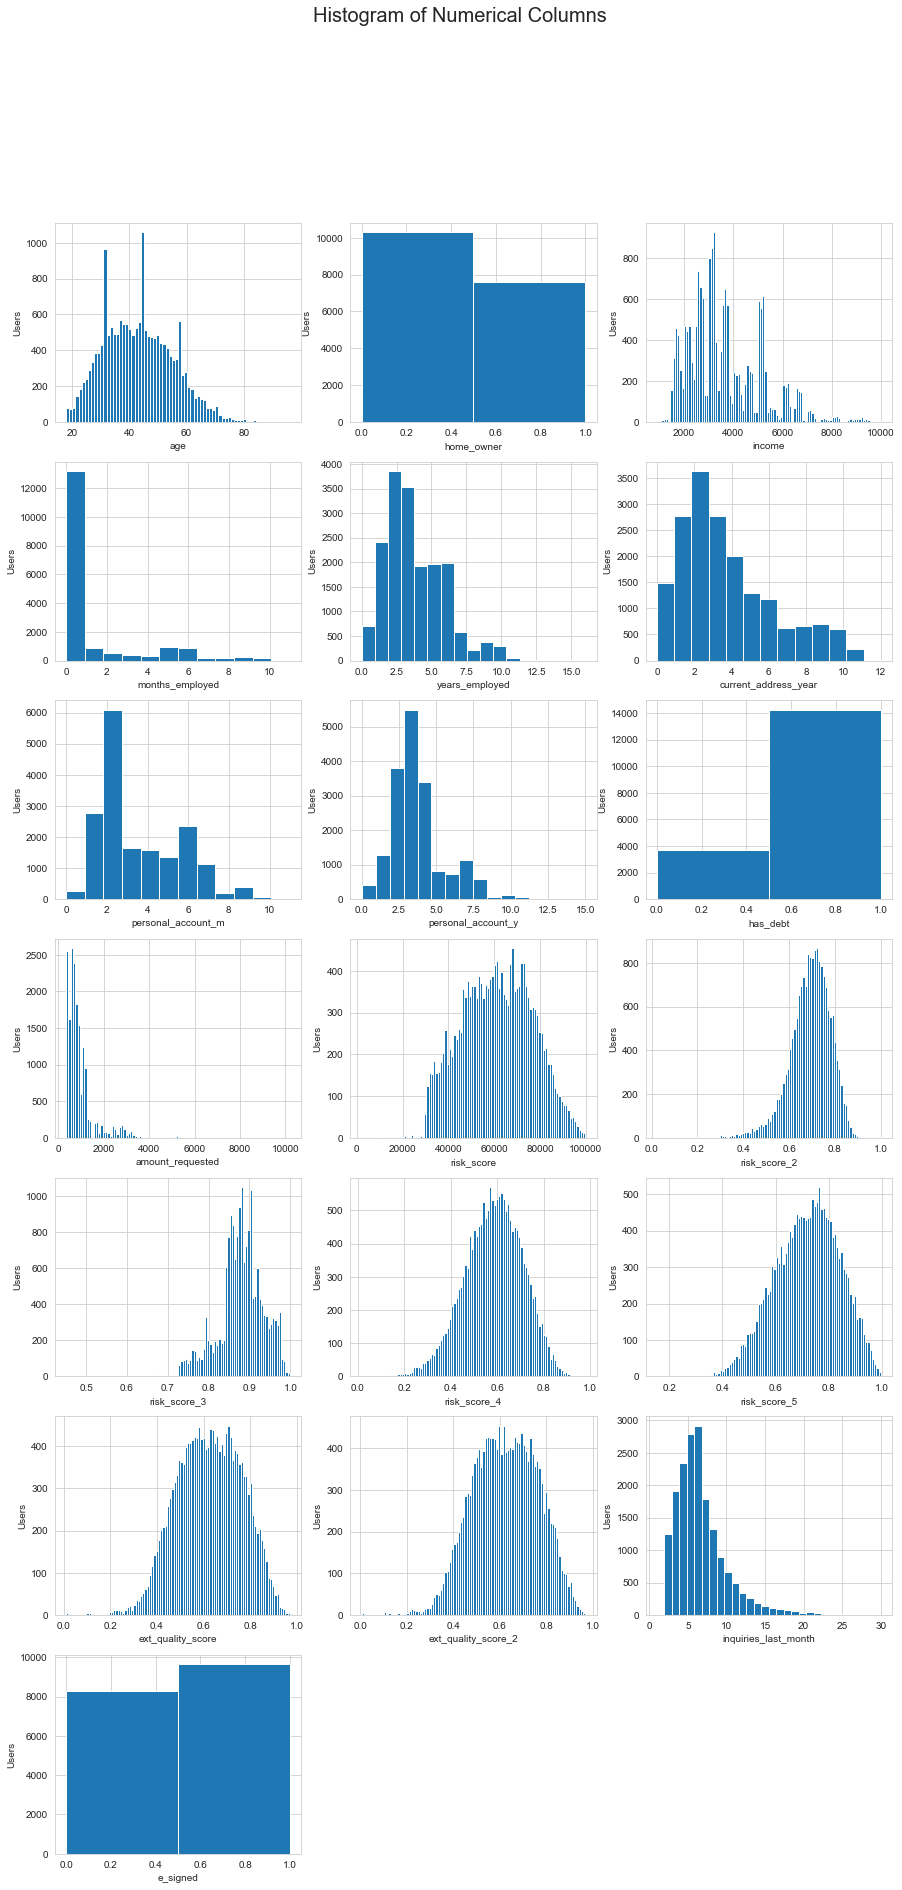

In [11]:
# del_col = ['entry_id', 'risk_score_2', 'risk_score_4', 'risk_score_5', 
#            'ext_quality_score', '']
# columns = data.drop(del_col, axis=1).columns

columns = data.drop(['entry_id', 'pay_schedule'], axis=1).columns

plt.figure(figsize=(15, 30))
plt.suptitle("Histogram of Numerical Columns", fontsize=20)

for i, col in enumerate(columns, 1):
    plt.subplot(7, 3, i)
    val = data[col].nunique()
    if val > 100:
        val = 100
    data[col].hist(bins=val)
    plt.xlabel(f'{col}')
    plt.ylabel("Users")

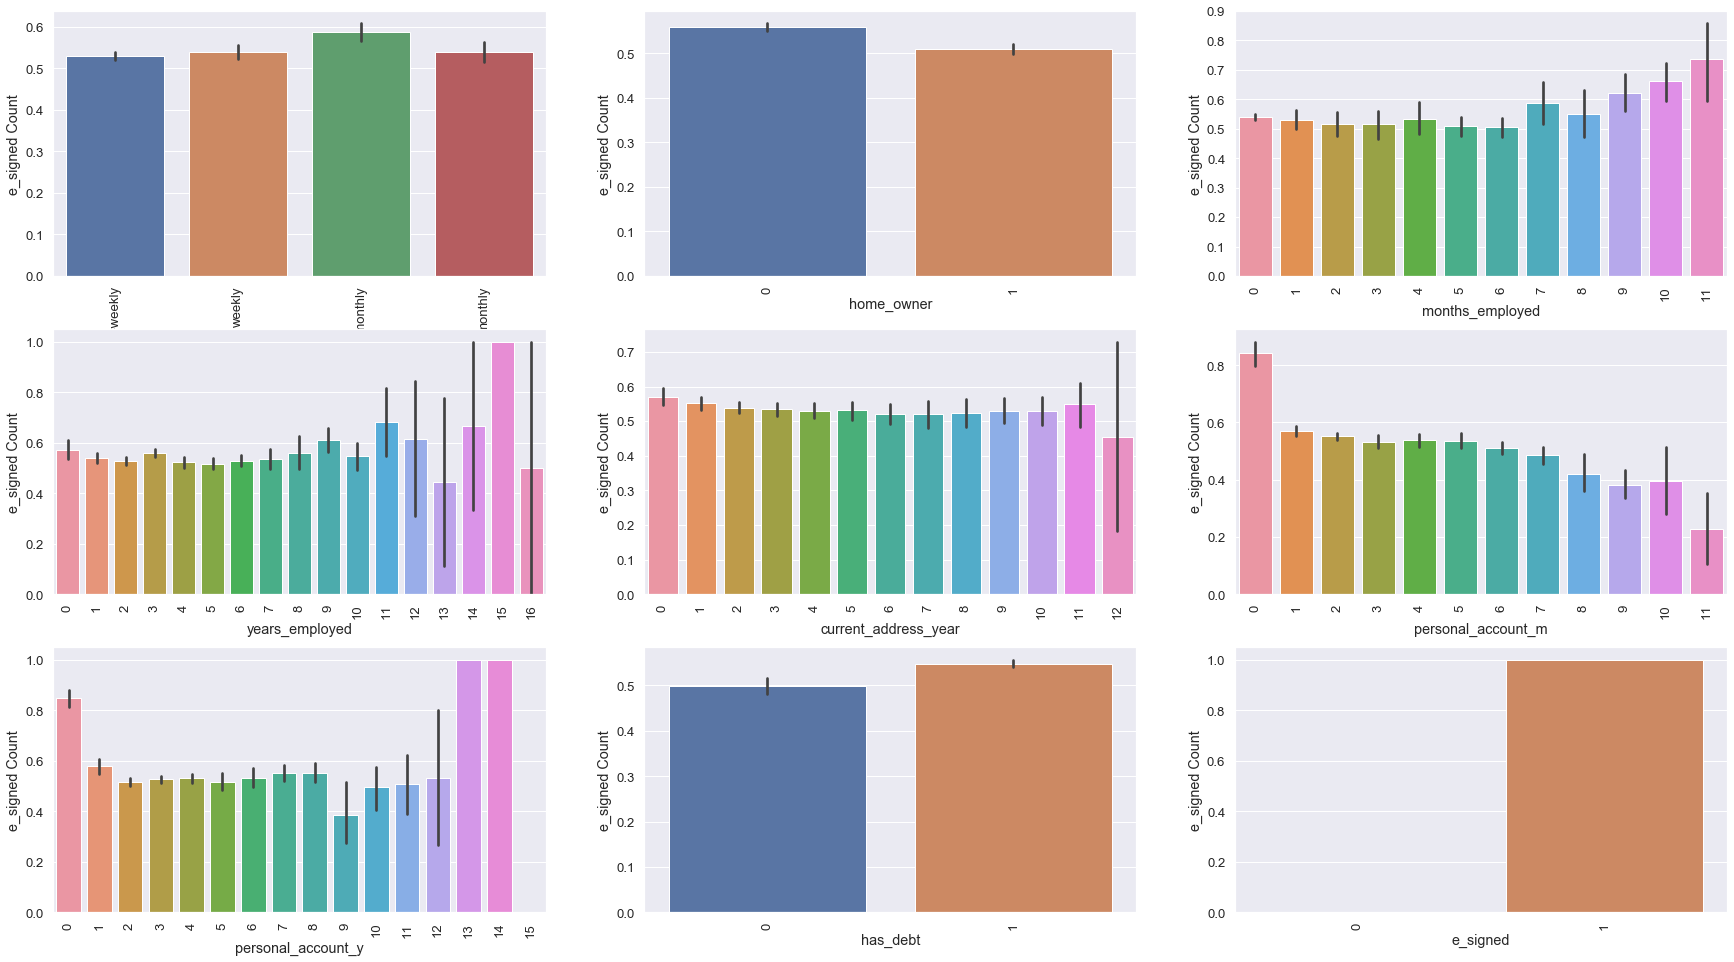

In [12]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 40))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(7, 3, i)
    g = sns.barplot(x=f"{column}", y='e_signed', data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('e_signed Count')
    plt.xlabel(f'{column}')

### Correlation analysis

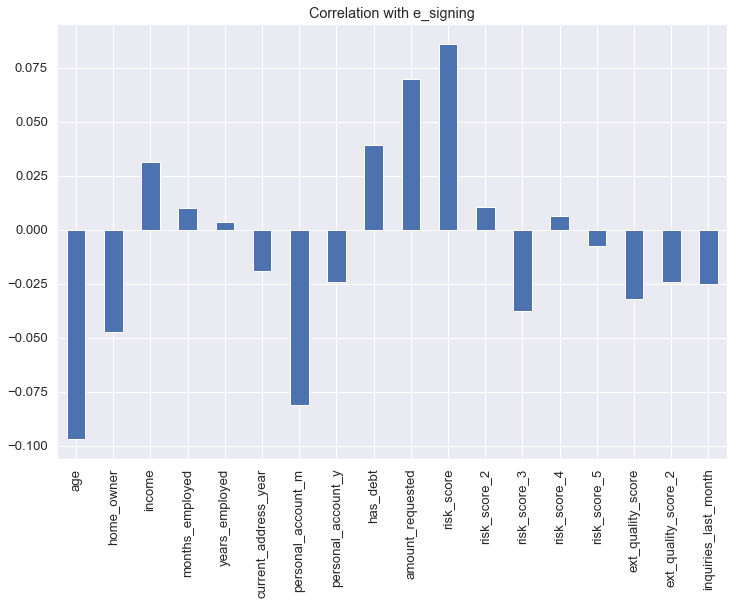

In [14]:
col = ['entry_id', 'e_signed']
data.drop(col, axis=1).corrwith(data.e_signed).plot(kind='bar', figsize=(12, 8), 
                                                    grid=True, 
                                                    title='Correlation with e_signing')

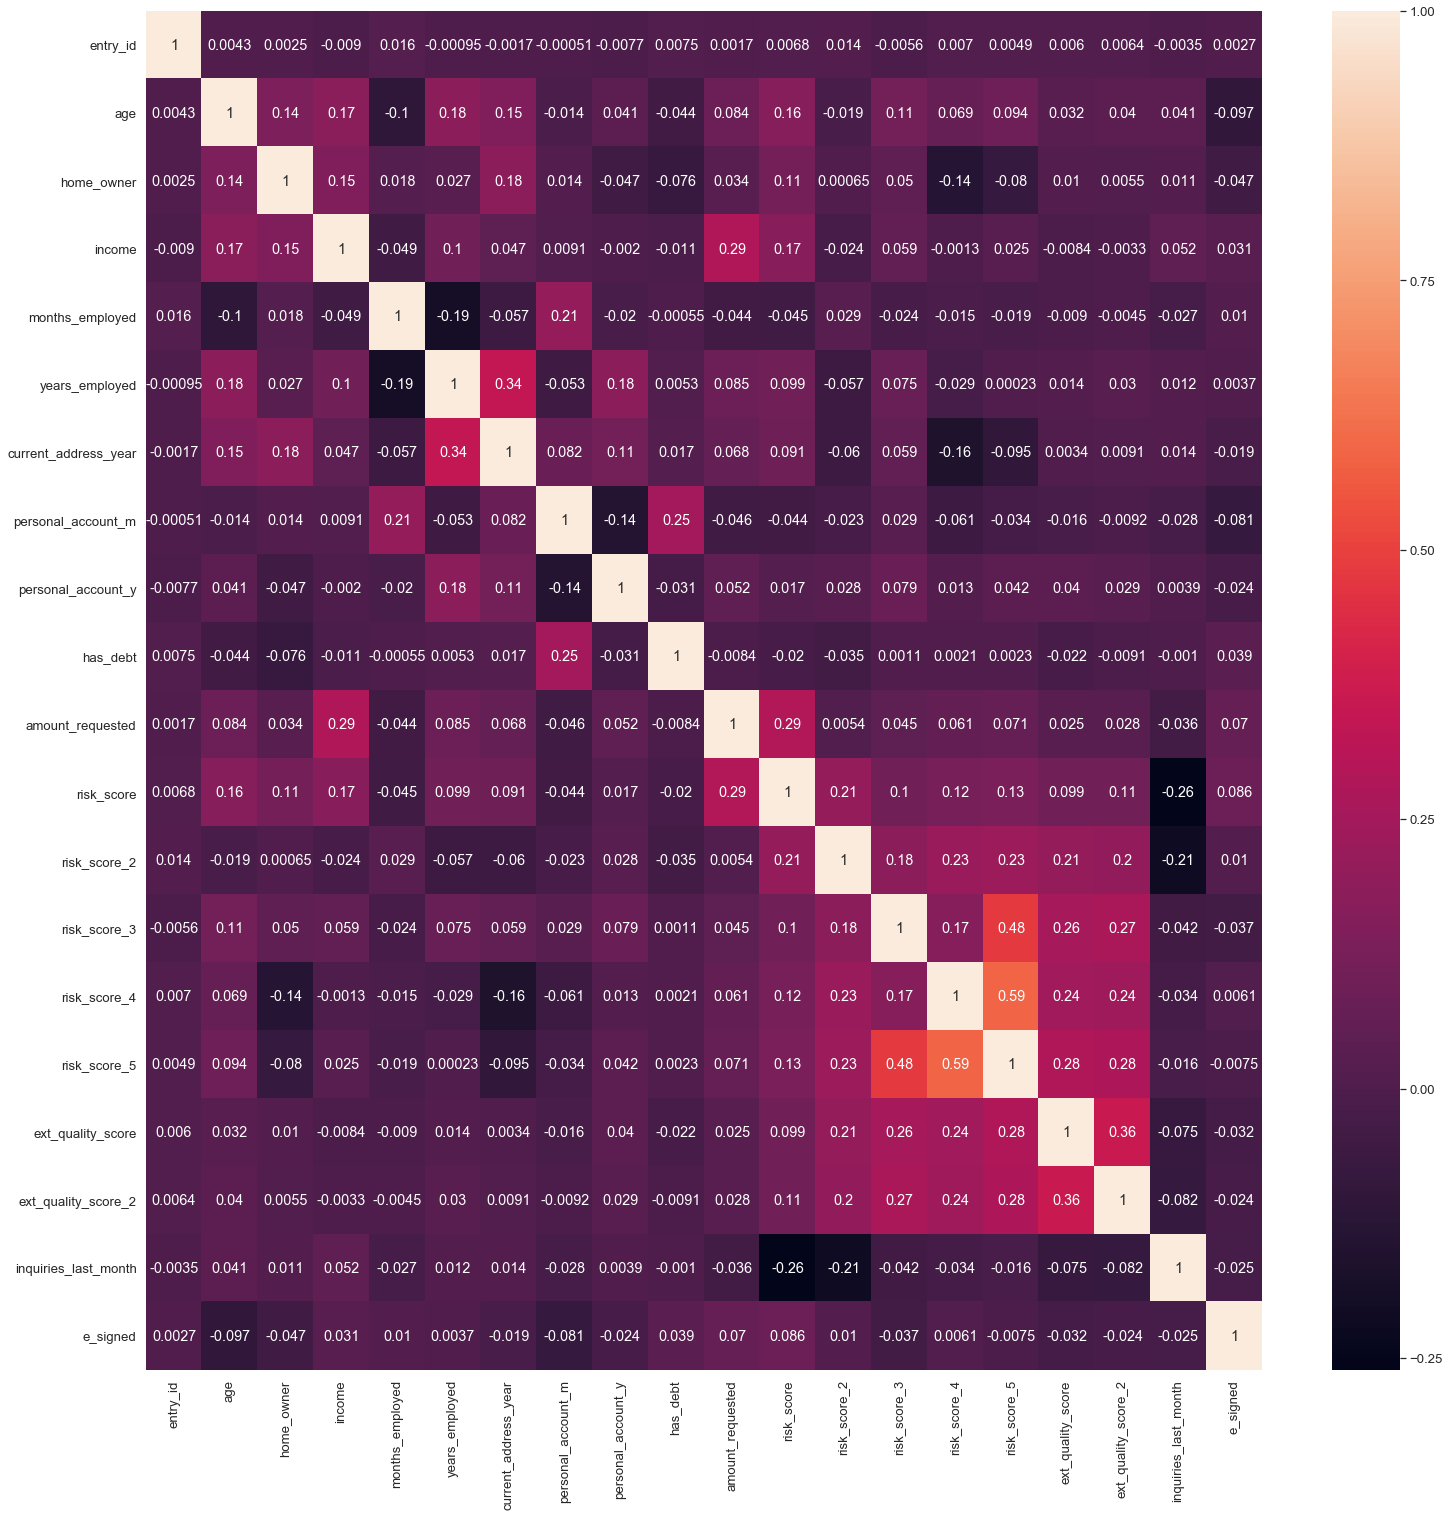

In [15]:
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True)

# 5. FEATURES ENGINEERING

### Search for duplicat rows

In [16]:
data.drop_duplicates(keep="first", inplace=True)
data.shape

(17908, 21)

In [17]:
data.shape

(17908, 21)

### Search for duplicat features

In [18]:
data.T.drop_duplicates().shape

(21, 17908)

In [19]:
data.drop('months_employed', axis=1, inplace=True)

In [20]:
data.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'years_employed', 'current_address_year', 'personal_account_m',
       'personal_account_y', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed'],
      dtype='object')

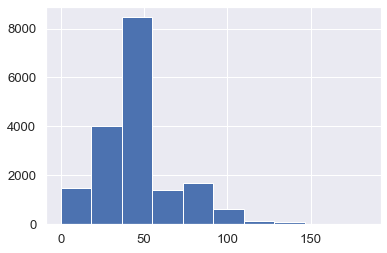

In [21]:
data['personal_account_months'] = (data.personal_account_m + (data.personal_account_y * 12))
data.personal_account_months.hist()

In [22]:
data.drop(['personal_account_m', 'personal_account_y'], axis=1, inplace=True)

In [23]:
data.head()

,entry_id,age,pay_schedule,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,personal_account_months
0,7629673,40,bi-weekly,1,3135,3,3,1,550,36200,0.74,0.90,0.49,0.52,0.58,0.38,10,1,30
1,3560428,61,weekly,0,3180,6,3,1,600,30150,0.74,0.88,0.71,0.83,0.73,0.63,9,0,86
2,6934997,23,weekly,0,1540,0,0,1,450,34550,0.64,0.77,0.60,0.76,0.53,0.53,7,0,19
3,5682812,40,bi-weekly,0,5230,6,1,1,700,42150,0.67,0.96,0.77,0.78,0.79,0.59,8,1,86
4,5335819,33,semi-monthly,0,3590,5,2,1,1100,53850,0.62,0.86,0.61,0.67,0.74,0.74,12,0,98


# 6. DATA PREPROCESSING

### One Hot-encoding

In [24]:
categorical_col = []

for column in data.drop('e_signed', axis=1).columns:
    if data[column].nunique() <= 10:
        categorical_col.append(column)
        
categorical_col

['pay_schedule', 'home_owner', 'has_debt']

In [25]:
data_1 = pd.get_dummies(data, columns=categorical_col)

In [26]:
len(data_1.columns)

24

In [27]:
X = data_1.drop(['entry_id', 'e_signed'], axis=1)
y = data_1.e_signed

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def accuracy_report(y_test, y_test_pred, sample):
    print(f"========={sample} data============ :\n=>Accuracy Score {accuracy_score(y_test, y_test_pred)}")
    print(f"=>Confusion Matrix :\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"=>Classification Report :\n{classification_report(y_test, y_test_pred)}")

# 7. MODEL BUILDING

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

x_sc = StandardScaler()
X_std = x_sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', penalty='l1')
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [30]:
accuracy_report(y_train, y_train_pred, 'Train')

=========Train data============ :
=>Accuracy Score 0.5760854390618456
=>Confusion Matrix :
[[2688 3929]
 [2144 5565]]
=>Classification Report :
              precision    recall  f1-score   support

           0       0.56      0.41      0.47      6617
           1       0.59      0.72      0.65      7709

    accuracy                           0.58     14326
   macro avg       0.57      0.56      0.56     14326
weighted avg       0.57      0.58      0.57     14326



In [31]:
accuracy_report(y_test, y_test_pred, 'Test')

=========Test data============ :
=>Accuracy Score 0.5675600223338917
=>Confusion Matrix :
[[ 676  976]
 [ 573 1357]]
=>Classification Report :
              precision    recall  f1-score   support

           0       0.54      0.41      0.47      1652
           1       0.58      0.70      0.64      1930

    accuracy                           0.57      3582
   macro avg       0.56      0.56      0.55      3582
weighted avg       0.56      0.57      0.56      3582



In [32]:
scores = cross_val_score(model, X_std, y, cv=10)

In [33]:
scores

array([0.57342267, 0.57677275, 0.55499721, 0.58235623, 0.58570631,
       0.57174763, 0.58179788, 0.57844779, 0.55499721, 0.58915595])

### Support Vector Machine (SVM)

In [ ]:
# from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline

# x_sc = StandardScaler()
# X_std = x_sc.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# svm_model = SVC(kernel='linear', gamma='auto', C=1.0)
# pipeline = Pipeline([("svm_model", SVC(kernel='linear', gamma='auto', C=1.0))])
# params = {"svm_model__C":(0.1, 0.5, 1, 2, 5, 10, 20), 
#           "svm_model__gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1), 
#           "svm_model__kernel":('linear', 'poly', 'rbf')}

# svm_grid = GridSearchCV(pipeline, params, n_jobs=-1, cv=3, verbose=1, scoring="accuracy", 
#                         iid=True)

# svm_grid.fit(X_train, y_train)
# svm_grid
# y_train_pred = svm_grid.predict(X_train)
# y_test_pred = svm_grid.predict(X_test)

In [ ]:
accuracy_report(y_train, y_train_pred, 'Train')

In [ ]:
accuracy_report(y_test, y_test_pred, 'Test')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=100)
# classifier.fit(X_train, y_train)

param_grid = {'max_depth':[3, None], 'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 10], 'bootstrap':[True, False], 
              'criterion':["gini", "entropy"]}

rf_grid_search_cv = GridSearchCV(classifier, param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
rf_grid_search_cv.fit(X_train, y_train)

y_train_pred = rf_grid_search_cv.predict(X_train)
y_test_pred = rf_grid_search_cv.predict(X_test)

In [ ]:
accuracy_report(y_train, y_train_pred, 'Train')
accuracy_report(y_test, y_test_pred, 'Test')

# 8. CONCLUSION


- Our model has given us an accuracy of around 64%. With this , we have an algorithm that can help predict whether or not a user will complete the E-signing step of the loan application. One way to leverage this model is to target those predicted to not reach the e-sign phase with customized onboarding. This means that when a lead arrives from the marketplace, they may receive a different onboarding experience based on how likely they are to finish the general onboarding process. This can help our company minimize how many people drop off from the funnel. This funnel of screens is as effective as we , as a company, built it. Therefore, user drop-off in this funnel falls entirely on our shoulders. So, with new onboarding screens built intentionally to lead users to finalize the loan application, we can attempt to get more than 40% of those predicted to not finish the process to complete the e-sign step. If we can do this, then we can drastically increase profits. As a result, if we can increase the number of loan takers, we are increasing profits. All with a simple model.